In [5]:
pip install google-search-results

Note: you may need to restart the kernel to use updated packages.


In [7]:
from serpapi import GoogleSearch
import pandas as pd
import time
import re

# Helper to extract review count safely
def safe_get_reviews(reviews):
    if isinstance(reviews, dict):
        return reviews.get("text")
    elif isinstance(reviews, int):
        return str(reviews)
    return None

# Extract Brand from title
def extract_brand(title):
    return title.split()[0] if title else "Unknown"

# Extract RAM size like 8GB or 16GB
def extract_ram(title):
    match = re.search(r'(\d{1,2}\s?GB)', title.upper())
    return match.group(1).replace(" ", "") if match else "Unknown"

# Extract Processor like Intel Core i5, Ryzen 7, M1 etc.
def extract_processor(title):
    title = title.upper()
    patterns = [
        r"(INTEL\sCORE\sI[3579])",
        r"(INTEL\sI[3579])",
        r"(RYZEN\s[3579])",
        r"(APPLE\sM1|APPLE\sM2)",
        r"(M1|M2)"
    ]
    for pat in patterns:
        match = re.search(pat, title)
        if match:
            return match.group(1).title()
    return "Unknown"

# API key (replace with your real SerpApi key)
API_KEY = "5ebec07a333730597672452d265f9f0ecf478632ec8115179022be06e4dcfd26"

#parameters
base_params = {
    "engine": "amazon",
    "api_key":"5ebec07a333730597672452d265f9f0ecf478632ec8115179022be06e4dcfd26",
    "amazon_domain": "amazon.com", 
    "type": "search",
    "k": "laptop"  # Search laptops
}

# Main data container
all_products = []

# Scrape pages 1 to 50
for page in range(1, 51):
    print(f" Scraping Page {page}...")
    base_params["page"] = page

    try:
        search = GoogleSearch(base_params)
        results = search.get_dict()
        products = results.get("organic_results", [])

        for item in products:
            title = item.get("title", "")

            all_products.append({
                "Product Name": title,
                "Price": item.get("price"),
                "Rating": item.get("rating"),
                "Reviews": safe_get_reviews(item.get("reviews")),
                "Brand": extract_brand(title),
                "RAM": extract_ram(title),
                "Processor": extract_processor(title),
                "ASIN": item.get("asin"),
                "Link": item.get("link"),
            })

        time.sleep(1.5)  # Respect API rate limits

    except Exception as e:
        print(f" Error on page {page}: {e}")
        continue

# Convert to DataFrame & Save
df = pd.DataFrame(all_products)
df.to_csv("CS_amazon_scrape.csv", index=False)

print(f"\n Scraped {len(df)} laptop products with specs.")
print("Data saved to 'CS_amazon_scrape.csv'")
print(df.head())


 Scraping Page 1...
 Scraping Page 2...
 Scraping Page 3...
 Scraping Page 4...
 Scraping Page 5...
 Scraping Page 6...
 Scraping Page 7...
 Scraping Page 8...
 Scraping Page 9...
 Scraping Page 10...
 Scraping Page 11...
 Scraping Page 12...
 Scraping Page 13...
 Scraping Page 14...
 Scraping Page 15...
 Scraping Page 16...
 Scraping Page 17...
 Scraping Page 18...
 Scraping Page 19...
 Scraping Page 20...
 Scraping Page 21...
 Scraping Page 22...
 Scraping Page 23...
 Scraping Page 24...
 Scraping Page 25...
 Scraping Page 26...
 Scraping Page 27...
 Scraping Page 28...
 Scraping Page 29...
 Scraping Page 30...
 Scraping Page 31...
 Scraping Page 32...
 Scraping Page 33...
 Scraping Page 34...
 Scraping Page 35...
 Scraping Page 36...
 Scraping Page 37...
 Scraping Page 38...
 Scraping Page 39...
 Scraping Page 40...
 Scraping Page 41...
 Scraping Page 42...
 Scraping Page 43...
 Scraping Page 44...
 Scraping Page 45...
 Scraping Page 46...
 Scraping Page 47...
 Scraping Page 48...
 

In [11]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Load Data
df = pd.read_csv("CS_amazon_scrape.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (486, 9)


,Product Name,Price,Rating,Reviews,Brand,RAM,Processor,ASIN,Link
0,"15.6-inch Windows 11 Laptop, 16GB RAM, 512GB S...",$269.00,4.2,207.0,15.6-inch,16GB,Unknown,B0DBZ5SL9T,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,17 Inch Laptop Privacy Screen Shield for 5:4 D...,$68.99,3.9,4.0,17,Unknown,Unknown,B09YKZ9ZMK,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,Apple 2025 MacBook Air 13-inch Laptop with M4 ...,$849.00,4.8,1256.0,Apple,16GB,Unknown,B0DZD9S5GC,https://www.amazon.com/Apple-2025-MacBook-13-i...
3,"Lenovo IdeaPad (15.6"" FHD Anti-Glare, Intel Co...",$499.99,4.2,9.0,Lenovo,16GB,Intel Core I5,B0F12WMB5Z,https://www.amazon.com/IdeaPad-Anti-Glare-i5-1...
4,"Naclud 17.3 Inch Laptop Computer, Windows 11 L...",NaN,4.6,27.0,Naclud,4GB,Unknown,B0F8NYXWRW,https://www.amazon.com/Naclud-Computer-Process...


### Data Cleaning: Handle Missing, Duplicates, Outliers

In [15]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Remove rows with missing price or rating
df = df.dropna(subset=["Price", "Rating"])

# Convert data types
df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Fill remaining nulls
df["RAM"].fillna("Unknown", inplace=True)
df["Processor"].fillna("Unknown", inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Remove outliers using IQR
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Price"] >= Q1 - 1.5 * IQR) & (df["Price"] <= Q3 + 1.5 * IQR)]

print("Cleaned Data Shape:", df.shape)
df.describe()

Missing values:
 Product Name     0
Price           11
Rating          16
Reviews         16
Brand            0
RAM              0
Processor        0
ASIN             0
Link             0
dtype: int64
Cleaned Data Shape: (442, 9)


,Price,Rating,Reviews
count,442.000000,442.000000,442.000000
mean,429.927353,4.427828,650.466063
std,330.424321,0.344334,1526.289500
min,22.940000,3.200000,1.000000
25%,192.990000,4.200000,13.000000
50%,309.000000,4.400000,61.000000
75%,648.260000,4.700000,397.000000
max,1399.990000,5.000000,6224.000000


In [40]:
df.to_csv("cleaned_laptop_data.csv", index=False)
print("Saved final clean dataset as 'cleaned_laptop_data.csv'")


Saved final clean dataset as 'cleaned_laptop_data.csv'


### Exploratory Data Analysis (EDA)

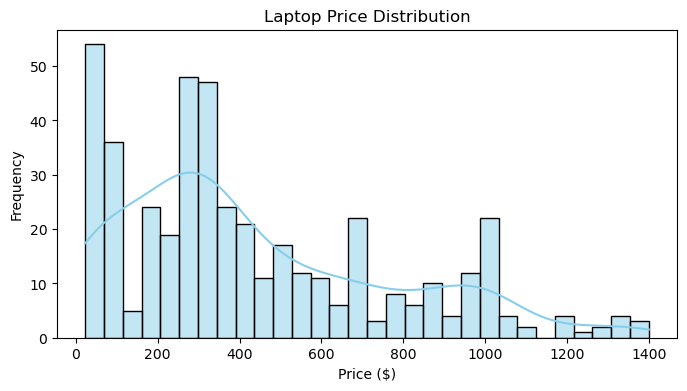

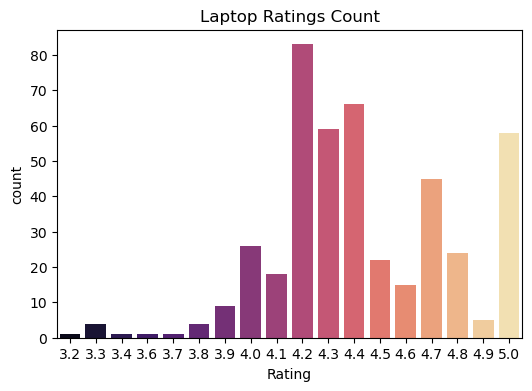

In [42]:
# Price Distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Price"], bins=30, kde=True, color='skyblue')
plt.title("Laptop Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df, palette="magma")
plt.title("Laptop Ratings Count")
plt.show()


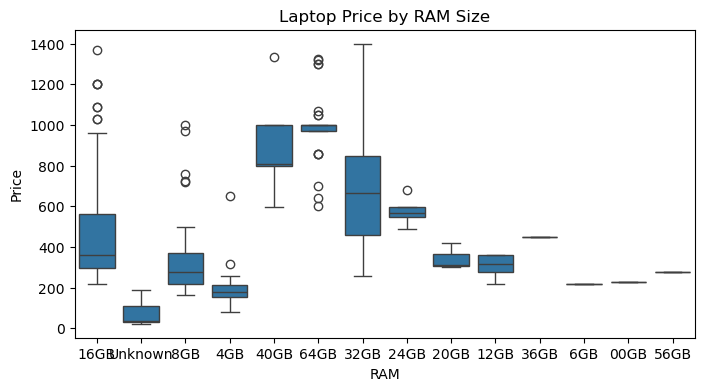

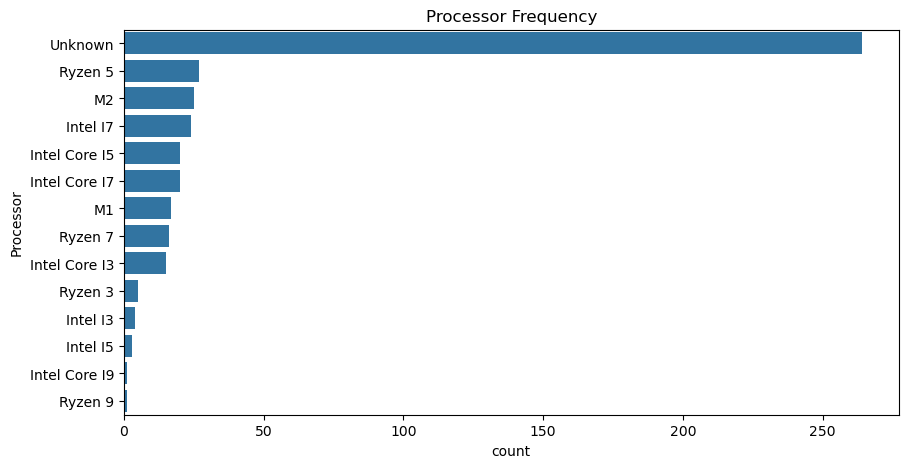

In [44]:
# RAM vs Price
plt.figure(figsize=(8,4))
sns.boxplot(x="RAM", y="Price", data=df)
plt.title("Laptop Price by RAM Size")
plt.show()

# Processor Counts
plt.figure(figsize=(10,5))
sns.countplot(y="Processor", data=df, order=df["Processor"].value_counts().index)
plt.title("Processor Frequency")
plt.show()


### Summary statistics

In [46]:
#Descriptive Stats
summary = df[["Price", "Rating"]].describe()
print("Summary Statistics:\n", summary)


Summary Statistics:
              Price      Rating
count   442.000000  442.000000
mean    429.927353    4.427828
std     330.424321    0.344334
min      22.940000    3.200000
25%     192.990000    4.200000
50%     309.000000    4.400000
75%     648.260000    4.700000
max    1399.990000    5.000000


### Correlation Analysis

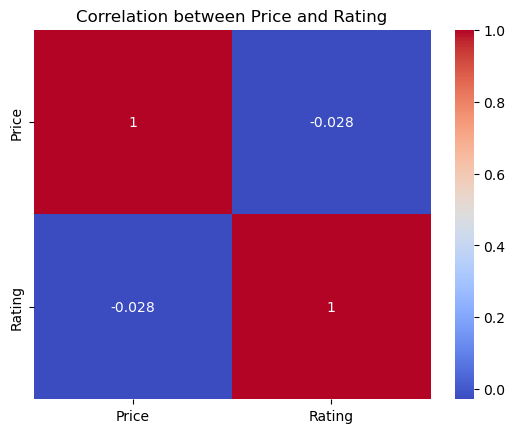

In [48]:
#Correlation Heatmap
corr = df[["Price", "Rating"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Price and Rating")
plt.show()


### Hypothesis Testing

In [32]:
group_8gb = df[df["RAM"] == "8GB"]["Price"]
group_16gb = df[df["RAM"] == "16GB"]["Price"]

# Welch’s t-test
t_stat, p_val = stats.ttest_ind(group_8gb, group_16gb, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Statistically significant price difference between 8GB and 16GB laptops.")
else:
    print("No significant price difference between 8GB and 16GB laptops.")


T-statistic: -3.390
P-value: 0.001
Statistically significant price difference between 8GB and 16GB laptops.


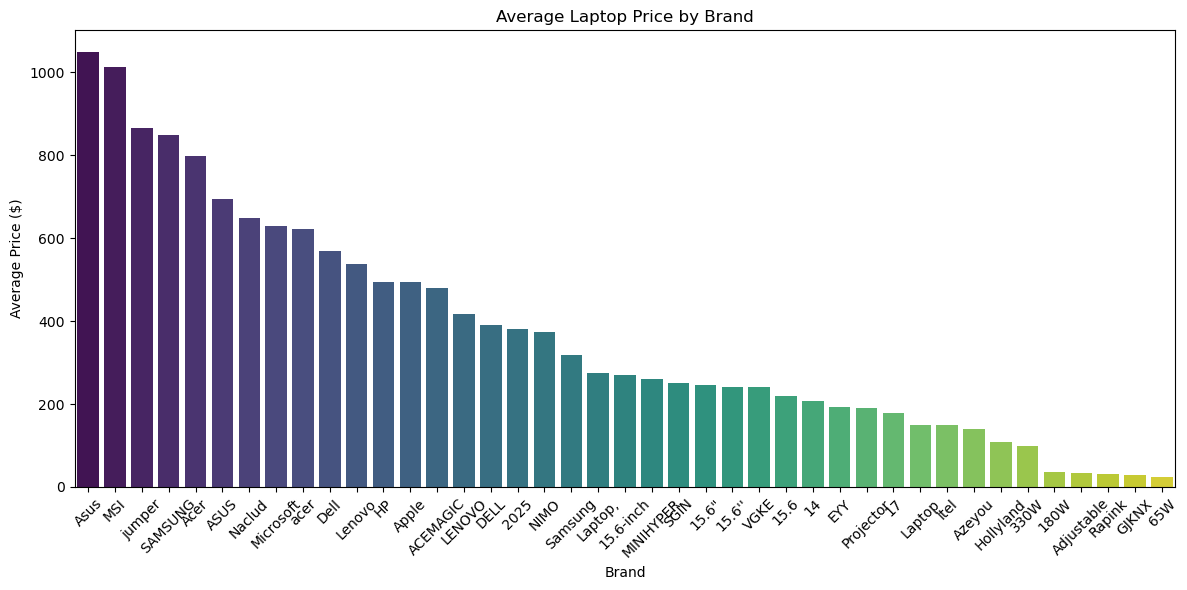

In [34]:
# Average Price by Brand
avg_price_by_brand = df.groupby("Brand")["Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette="viridis")
plt.title("Average Laptop Price by Brand")
plt.ylabel("Average Price ($)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


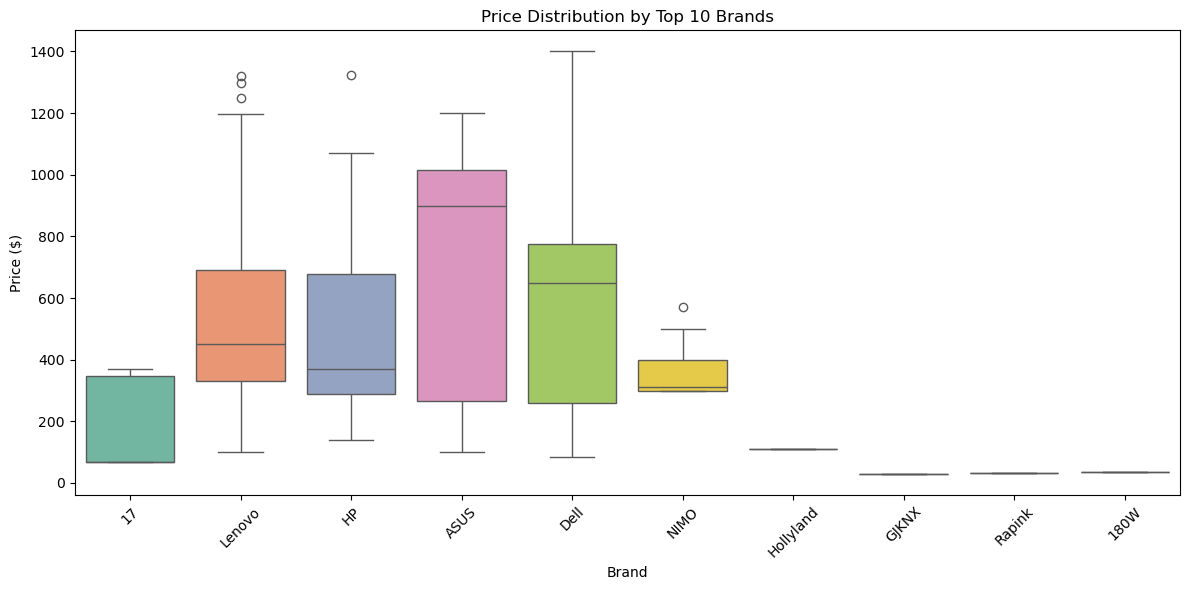

In [36]:
# Boxplot to show price spread per brand
top_brands = df["Brand"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x="Brand", y="Price", data=df[df["Brand"].isin(top_brands)], palette="Set2")
plt.title("Price Distribution by Top 10 Brands")
plt.ylabel("Price ($)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 508.0 kB/s eta 0:00:32
   - -------------------------------------- 0.5/16.4 MB 508.0 kB/s eta 0:00:32
   - -------------------------------------- 0.8/16.4 MB 599.2 kB/s eta 0:00:26
   -- ------------------------------------- 1.0/16.4 MB 699.0 kB/s eta 0:00:22
   -- ------------------------------------- 1.0/16.4 MB 699.0 kB/s eta 0:00:22
   --- ------------------------------------ 1.3/16.4 MB 677.8 kB/s eta 0:00:23
   --- -----------------------------

In [76]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

# Load cleaned data
df = pd.read_csv("cleaned_laptop_data.csv")

# Connect to MySQL
conn = None
try:
    conn = mysql.connector.connect(
        host="localhost",      
        user="root",           
        password="@Tkani7321",         
        database="capstone_laptop_data"  # DB we created earlier
    )
    
    if conn.is_connected():
        print("Connected to MySQL")

        cursor = conn.cursor()

        # Insert each row into MySQL
        for _, row in df.iterrows():
            sql = """
            INSERT INTO laptops 
            (product_name, price, rating, reviews, asin, link, brand, ram, processor)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
            """
            data = (
                row["Product Name"], row["Price"], row["Rating"], row["Reviews"],
                row["ASIN"], row["Link"], row["Brand"], row["RAM"], row["Processor"]
            )
            cursor.execute(sql, data)

        conn.commit()
        print("Data inserted successfully")

except Error as e:
    print("Error:", e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection closed")


Connected to MySQL
Data inserted successfully
MySQL connection closed
